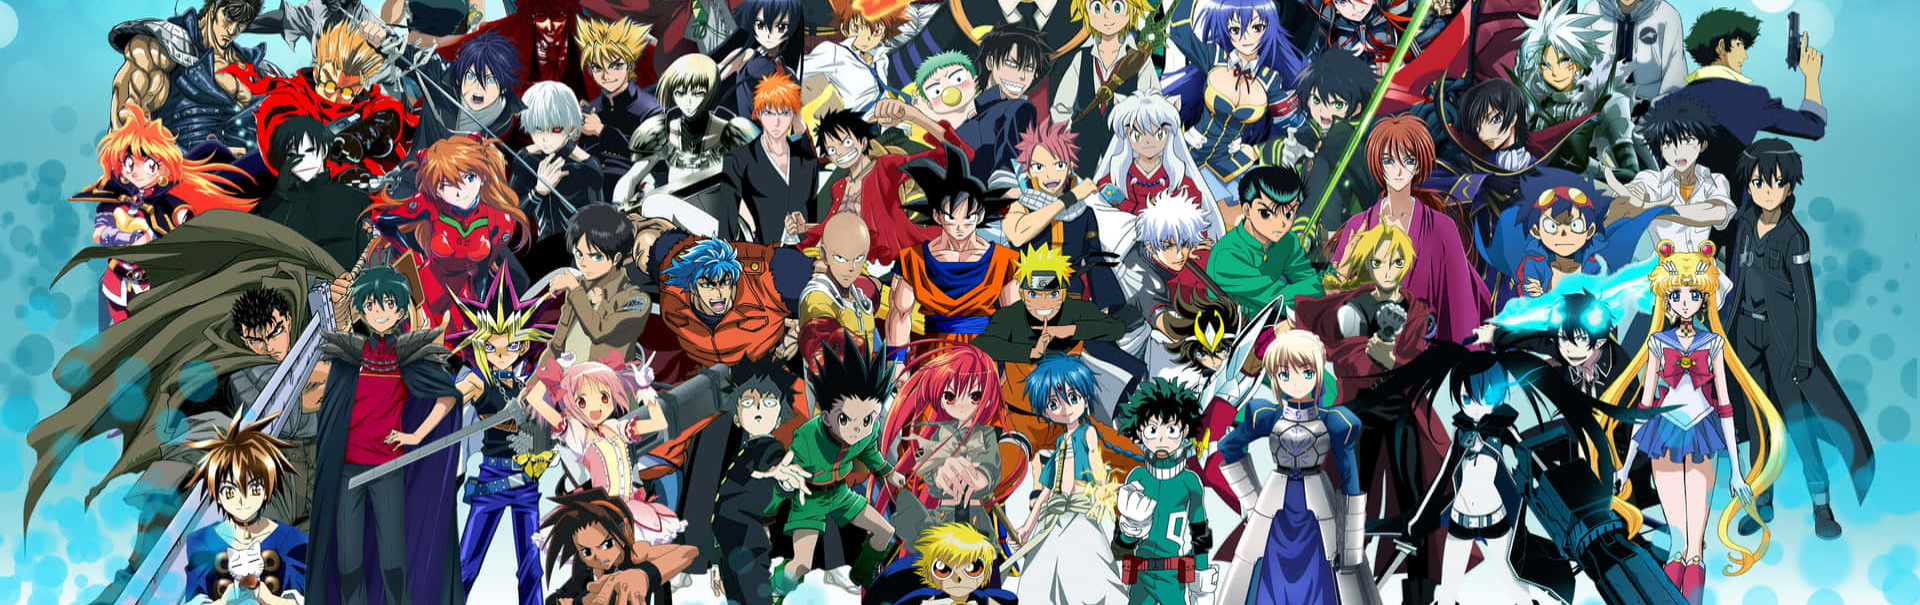

# Análise de Dados dos Animes

## Objetivo

Realizar a análise exploratória de dados (EDA), utilizando
ferramentas estatísticas e computacionais para extrair insights de um conjunto de dados real. O trabalho visa a aplicacão prática de técnicas de
visualização, estatísticas descritivas e análise gráfica.

## Discentes

1. Erich Johann Costa de Carvalho
2. Erick Andrade Borba
3. Milena Caroline da Silva Soares
4. Sarah Stephany da Cruz Souza Campos

## Conjunto de dados

O conjunto de dados escolhido para esse trabalho é um levantamento dos animes até 2022 cujo conteúdo foi extraído do MyAnimeList e Anime Background.
Possui 21460 linhas e 28 colunas.

**Disponível em:** https://www.kaggle.com/datasets/harits/anime-database-2022

In [ ]:
# Importando bibliotecas necessárias para tratamento e visualização dos dados
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Análise Exploratória de Dados
Conhecendo os dados da base

In [ ]:
df = pd.read_csv('Anime.csv')
df.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

In [ ]:
df.isnull().sum()

,0
ID,0
Title,0
Synonyms,0
Japanese,0
English,0
Synopsis,0
Type,0
Episodes,547
Status,0
Start_Aired,0


In [ ]:
# Estatísticas descritivas antes do tratamento
df.describe()

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.000000,20913.000000,20861.000000,14562.000000,14562.000000,19536.000000,21460.000000,2.146000e+04,21460.000000
mean,26458.575582,13.272892,23.934135,6.421724,26507.173809,97795.212019,10743.103681,3.926596e+04,462.214865
std,17100.477121,48.792326,24.676538,0.910469,84989.501599,56485.384273,6204.685188,1.566359e+05,4411.931536
min,1.000000,1.000000,1.000000,1.841000,101.000000,12.000000,1.000000,6.000000e+00,0.000000
25%,8454.750000,1.000000,5.000000,5.791000,418.000000,48879.500000,5369.750000,2.910000e+02,0.000000
50%,31004.500000,2.000000,22.000000,6.431000,1876.500000,97777.000000,10741.500000,1.582500e+03,2.000000
75%,40495.250000,12.000000,26.000000,7.081000,11406.500000,146714.500000,16119.250000,1.158550e+04,23.000000
max,53094.000000,3057.000000,168.000000,9.131000,997243.000000,195632.000000,21490.000000,3.524109e+06,207772.000000


## Tratamento de Dados

In [ ]:
# Eliminando duplicadas
df.drop_duplicates()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21455,45064,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo,Unknown,小公主艾薇拉与神秘王国,Princess and the Kingdom,Unknown,Movie,1.0,Finished Airing,"May 12, 2018",...,Unknown,Kids,78.0,G - All Ages,NaN,NaN,160892.0,21487,7,0
21456,45065,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2,Unknown,小公主艾薇拉与神秘王国2,Avera and the Mystical Kingdom 2,Unknown,Movie,1.0,Finished Airing,"Aug 22, 2020",...,Unknown,Kids,80.0,G - All Ages,NaN,NaN,160902.0,21488,6,0
21457,45059,Yongzhe Chuang Mo Cheng,Unknown,勇者闯魔城,Brave City,Unknown,Movie,1.0,Finished Airing,"Mar 16, 2018",...,Unknown,Unknown,80.0,G - All Ages,NaN,NaN,164032.0,21489,6,0
21458,45063,Yu Shen Chuan: Wangzhe Shaonian,Unknown,禹神传之王者少年,The Juvenile of King Yu,Unknown,Movie,1.0,Finished Airing,"Aug 15, 2018",...,Unknown,Unknown,90.0,G - All Ages,NaN,NaN,164462.0,21490,6,0


In [ ]:
# Eliminando registros que possuem informações essenciais nulas, como Ranked, Score, Episodes e Gênero desconhecido
df = df.loc[df['Ranked'].notnull()]
df = df.loc[df['Score'].notnull()]
df = df.loc[df['Episodes'].notnull()]
df = df[~df['Genres'].str.contains('Unknown', na=False)]

In [ ]:
df.isnull().sum()

,0
ID,0
Title,0
Synonyms,0
Japanese,0
English,0
Synopsis,0
Type,0
Episodes,0
Status,0
Start_Aired,0


#### Tratamento dos Ratings
Para os ratings nulos, decidimos atribuir a moda do rating de acordo com o gênero.
Como cada anime pode estar enquadrado em mais de um gênero, atribuímos o rating do gênero mais "restrito" que aquele anime possui.

In [ ]:
df.value_counts('Genres')

,count
Genres,
Comedy,1100
Fantasy,398
"Comedy, Slice of Life",396
"Action, Sci-Fi",367
Action,353
...,...
"Mystery, Romance, Slice of Life",1
"Mystery, Romance, Sci-Fi",1
"Mystery, Romance, Ecchi",1


In [ ]:
# Separa a coluna de gênero em gêneros diferentes
genres = df['Genres'].str.split(', ').explode()
# Exibe todos os gêneros únicos
generos_unicos = genres.unique()
print(generos_unicos)

['Action' 'Drama' 'Supernatural' 'Suspense' 'Adventure' 'Fantasy' 'Comedy'
 'Romance' 'Horror' 'Sci-Fi' 'Ecchi' 'Mystery' 'Sports' 'Award Winning'
 'Avant Garde' 'Slice of Life' 'Gourmet' 'Boys Love' 'Girls Love']


In [ ]:
# Seleciona cada gênero único e encontra a moda do rating de cada
for genre in generos_unicos:
    genre_df = df[df['Genres'].str.contains(genre, na=False)].copy()
    if not genre_df.empty:
        mode_rating = genre_df['Rating'].mode()
        print(f"Genre: {genre}")
        print(f"Mode Rating: {mode_rating.tolist()}")
    else:
        print(f"Genre: {genre}")
        print("No data found for this genre.")

Genre: Action
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Drama
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Supernatural
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Suspense
Mode Rating: ['R - 17+ (violence & profanity)']
Genre: Adventure
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Fantasy
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Comedy
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Romance
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Horror
Mode Rating: ['R - 17+ (violence & profanity)']
Genre: Sci-Fi
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Ecchi
Mode Rating: ['R+ - Mild Nudity']
Genre: Mystery
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Sports
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Award Winning
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Avant Garde
Mode Rating: ['G - All Ages']
Genre: Slice of Life
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Gourmet
Mode Rating: ['PG-13 - Teens 13 or older']
Genre: Boys

In [ ]:
# Substitui a moda do rating de cada gênero onde não tem rating
filtro_ecchi = df['Rating'].isnull() & df['Genres'].str.contains('Ecchi', na=False)
df.loc[filtro_ecchi, 'Rating'] = 'R+ - Mild Nudity'

filtro_17 = df['Rating'].isnull() & (df['Genres'].str.contains('Horror', na=False) | df['Genres'].str.contains('Suspense', na=False))
df.loc[filtro_17, 'Rating'] = 'R - 17+ (violence & profanity)'

df.loc[df['Rating'].isnull(), 'Rating'] = 'PG-13 - Teens 13 or older'


#### Tratamento do Type
Para os filmes com duração em minutos nula, atribuímos a média da duração dos filmes.
Entretanto, para o cálculo dessa média, desconsideramos os filmes com duração abaixo de 90 minutos. Já que em  pesquisas, identificamos 90 como a menor duração para ser considerado um filme.

Para os especiais com duração em minutos nula, atribuímos a média da duração dos especiais.

Para os ONAs com duração em minutos nula, atribuímos a média da duração dos ONAs.

In [ ]:
df.loc[df['Duration_Minutes'].isnull()]

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
4054,48830,Free! Movie 5: The Final Stroke - Kouhen,Gekijouban Free! The Final Stroke Kouhen,劇場版 Free!-the Final Stroke-,Unknown,The second part of the Free! The Final Stroke ...,Movie,1.0,Finished Airing,"Apr 22, 2022",...,School,Unknown,NaN,PG-13 - Teens 13 or older,7.391,609.0,20722.0,4057,22937,150
4445,35267,Shingeki no Kyojin-ten 360° Taikan Theater,"Taikan Theater ""Hoeru""","進撃の巨人展360°体感シアター“哮""",Attack on Titan Exhibition 360-degree Experien...,Virtual reality movies included with the Blu-r...,Special,3.0,Finished Airing,"Jun 21, 2017",...,Unknown,Shounen,NaN,PG-13 - Teens 13 or older,7.271,3705.0,26322.0,4450,18623,32
9190,31244,Makura no Danshi: Sono Ato no Makura no Danshi,"Makura no Danshi Special, Pillow Boys Special",枕男子 （まくらのだんし）「その後の枕男子」,Unknown,Unaired episode bundled with the Makura no Dan...,Special,1.0,Finished Airing,"Nov 27, 2015",...,Unknown,Unknown,NaN,PG-13 - Teens 13 or older,4.781,630.0,126772.0,9199,2775,2
10342,38629,Crayon Shin-chan Movie 27: Shinkon Ryokou Hurr...,Unknown,映画クレヨンしんちゃん 新婚旅行ハリケーン ~失われたひろし~,Crayon Shin-chan Honeymoon Hurricane - The Los...,Unknown,Movie,1.0,Finished Airing,"Apr 19, 2019",...,Unknown,Seinen,NaN,G - All Ages,6.781,615.0,49162.0,10354,1830,4
10960,35018,Osomatsu-san: Haru no Zenkoku Dai Senbatsu Jou...,Unknown,おそ松さん 春の全国大センバツ上映祭 銭湯クイズ2,Unknown,An all-new anime short episode included in a s...,Movie,1.0,Finished Airing,"Apr 6, 2017",...,Parody,Unknown,NaN,R - 17+ (violence & profanity),5.971,195.0,92242.0,10972,1435,2
11128,46004,2.43 Mini Anime: Inside Story,Unknown,2.43ミニアニメ inside story,Unknown,Mini anime where Kuroba introduces Monshiro To...,ONA,10.0,Finished Airing,"Jan 9, 2021",...,Unknown,Unknown,NaN,PG-13 - Teens 13 or older,5.221,267.0,119462.0,11139,1344,2
11399,46003,2.43 Mini Anime: Fukui-ben Kouza,Unknown,2.43ミニアニメ 福井弁講座,Unknown,"Mini anime about the Fukui dialect, released o...",ONA,8.0,Finished Airing,"Jan 7, 2021",...,Unknown,Unknown,NaN,PG-13 - Teens 13 or older,5.181,250.0,120302.0,11409,1216,5
11803,39362,Astro Boy: Tetsuwan Atom - Getsumen Kichi - Ki...,Unknown,ASTRO BOY 鉄腕アトム〜月面基地・消えたロボットの謎〜,Unknown,A planetarium film of Tetsuwan Atom. There's s...,Movie,1.0,Finished Airing,"May 29, 2004",...,"Mecha, Space",Kids,NaN,G - All Ages,6.511,339.0,63302.0,11814,1043,0
11843,30481,Ginga Tetsudou 999 for Planetarium,Galaxy Express 999 for Planetarium,銀河鉄道999 for PLANETARIUM,Unknown,The movie was screened in several Planetariums...,Movie,1.0,Finished Airing,"Jun 1, 2002",...,Space,Unknown,NaN,G - All Ages,6.341,160.0,72792.0,11856,1028,1
12894,35070,3-Nen D-Gumi Glass no Kamen: Tobidase! Watashi...,"3-Nen D-Gumi Glass no Kamen Gekijouban, 3-Nen ...",3ねんDぐみガラスの仮面～とびだせ! 私たちのVR（ヴィクトリーロード）～,Unknown,Unknown,Movie,1.0,Finished Airing,"Jul 22, 2017",...,"Parody, School",Unknown,NaN,PG - Children,5.521,119.0,110182.0,12908,720,1


In [ ]:
# Filtra filmes com 90 minutos ou mais para descobrir média
filtro_filmes = (df['Type'] != 'Movie') | (df['Duration_Minutes'] >= 90.0)
df_filtro_filmes = df.loc[filtro_filmes].reset_index(drop=True)
duracao_media_filme = df_filtro_filmes.loc[df_filtro_filmes['Type'] == 'Movie', 'Duration_Minutes'].mean()

In [ ]:
duracao_media_filme

np.float64(104.79795021961932)

In [ ]:
# Filmes com duração nula recebem a média dos filmes
filtro_filmes_dnulo = (df['Type'] == 'Movie') & (df['Duration_Minutes'].isnull())
df.loc[filtro_filmes_dnulo, 'Duration_Minutes'] = duracao_media_filme

In [ ]:
# Filmes com menos de 90 minutos são eliminados
filtro_filmes_90 = (df['Type'] != 'Movie') | (df['Duration_Minutes'] >= 90.0)
df = df.loc[filtro_filmes].reset_index(drop=True)

In [ ]:
# Calcula a duração média dos especiais
duracao_media_special = df.loc[df['Type'] == 'Special', 'Duration_Minutes'].mean()

In [ ]:
# Os especiais com durações nulas recebem a média
filtro_special_dnulo = (df['Type'] == 'Special') & (df['Duration_Minutes'].isnull())
df.loc[filtro_special_dnulo, 'Duration_Minutes'] = duracao_media_special

In [ ]:
# Calcula a duração média dos ONAs
duracao_media_ona = df.loc[df['Type'] == 'ONA', 'Duration_Minutes'].mean()

In [ ]:
# Os ONAs com durações nulas recebem a média
filtro_ona_dnulo = (df['Type'] == 'ONA') & (df['Duration_Minutes'].isnull())
df.loc[filtro_ona_dnulo, 'Duration_Minutes'] = duracao_media_ona

In [ ]:
# Estatísticas descritivas após o tratamento
df.describe()

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,1.010000e+04,10100.000000
mean,19825.914356,14.997129,26.598491,6.591286,35857.581980,60144.446535,6606.543564,7.746807e+04,931.633267
std,16151.558692,53.927163,25.852113,0.886289,99221.551378,36526.875937,4391.491562,2.191445e+05,6133.773667
min,1.000000,1.000000,1.000000,1.841000,102.000000,12.000000,1.000000,1.990000e+02,0.000000
25%,3703.500000,1.000000,11.000000,6.008500,611.750000,28609.500000,2765.750000,1.930750e+03,2.000000
50%,16333.000000,6.000000,24.000000,6.601000,3292.000000,58367.000000,6040.500000,8.720500e+03,13.000000
75%,35242.500000,13.000000,25.000000,7.221000,21571.250000,90352.000000,10200.250000,4.823025e+04,122.000000
max,53075.000000,3057.000000,168.000000,9.131000,997243.000000,131202.000000,17567.000000,3.524109e+06,207772.000000


## Análises

- rank por gênero - 4
- popularidade com número de episódios - 3
- studio com animes mais populares - 3
- quantidade de animes por studio - 2
- type e duração - 1
- favoritos e popularidade - 4


Erick:
- tema com broadcast - 5
- rating com broadcast - 4
- popularidade por gênero - 5
- duração/tempo de vida (start aired, end aired) e popularidade - 5


Erich:
- animes por premiered - 5
- quantidade de animes por ano - 4
- quantidade de animes por gênero - 5
- popularidade com rank - 5

Milena:
- animes mais populares - 5
- temas com rating - 5
- temas com demographics - 5
- rating com popularidade - 5

Sarah:
- source com popularidade - 4.5
- quantidade por source - 5
- favoritos por source - 4
- source com ranking - 4

## Insights


## Conclusão

